<a href="https://colab.research.google.com/github/daniballester-ai/ARIMA-Stock-Price-Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA Models for Stock Price Prediction ❌ How to Choose the p, d, q Terms to Build ARIMA Model

https://www.youtube.com/watch?v=gqryqIlvEoM

In [ ]:
!pip install pmdarima
!pip install numpy==1.26.4 # <-- Include NumPy Version
exit() # This forces a kernel restart to ensure new libraries are loaded

In [2]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns # Import seaborn

# Use seaborn's style settings
sns.set()

# Alternatively, to use a specific seaborn style:
# sns.set_style("whitegrid")
# sns.set_style("darkgrid")
# sns.set_style("ticks")

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('MSFT-1Y-Hourly.csv')

In [7]:
df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,06/06/2025,$470.38,15285620,$470.085,$473.335,$468.78
1,06/05/2025,$467.68,20154460,$464.955,$469.65,$464.03
2,06/04/2025,$463.87,14162690,$464.00,$465.69,$463.0201
3,06/03/2025,$462.97,15743760,$461.47,$464.14,$460.8622
4,06/02/2025,$461.97,16626500,$457.14,$462.11,$456.89


In [4]:
df = df['Close/Last'].copy()

In [9]:
df.describe()

,Close/Last
count,249
unique,249
top,$470.38
freq,1


In [5]:
# The column 'Close/Last' seems to be of type object and contains '$' sign.
# First, remove the '$' sign.
df = df.str.replace('$', '', regex=False)

# Convert the column to numeric (float).
df = pd.to_numeric(df)

# The column was already renamed to 'df' in the preceding code by selecting only 'Close/Last'.
# If you want to keep the original dataframe and rename the column there:
# Assuming the original dataframe is still available as 'df_original':
# df_original['close'] = df_original['Close/Last'].str.replace('$', '', regex=False)
# df_original['close'] = pd.to_numeric(df_original['close'])

# In this case, since df was already replaced by the column,
# we can just print the info or describe to confirm the change.
print(df.info())
print(df.describe())

<class 'pandas.core.series.Series'>
RangeIndex: 249 entries, 0 to 248
Series name: Close/Last
Non-Null Count  Dtype  
--------------  -----  
249 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None
count    249.000000
mean     421.638635
std       24.115813
min      354.560000
25%      409.040000
50%      422.370000
75%      438.690000
max      470.380000
Name: Close/Last, dtype: float64


In [11]:
df.head(5)

,Close/Last
0,470.38
1,467.68
2,463.87
3,462.97
4,461.97


In [6]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.640583
p-value: 0.084896


### Hypothesis

*   Null Hypothesis (H₀): The time series is not stationary (it has a unit root).
*   Alternative Hypothesis (H₁): The time series is stationary (it does not have a unit root).

ADF Statistic: -2.640583
p-value: 0.084896

Significance level of 5% (0.05): 0.084896 > 0.05. We do not reject H₀.

### Autocorrelation Function (ACF)

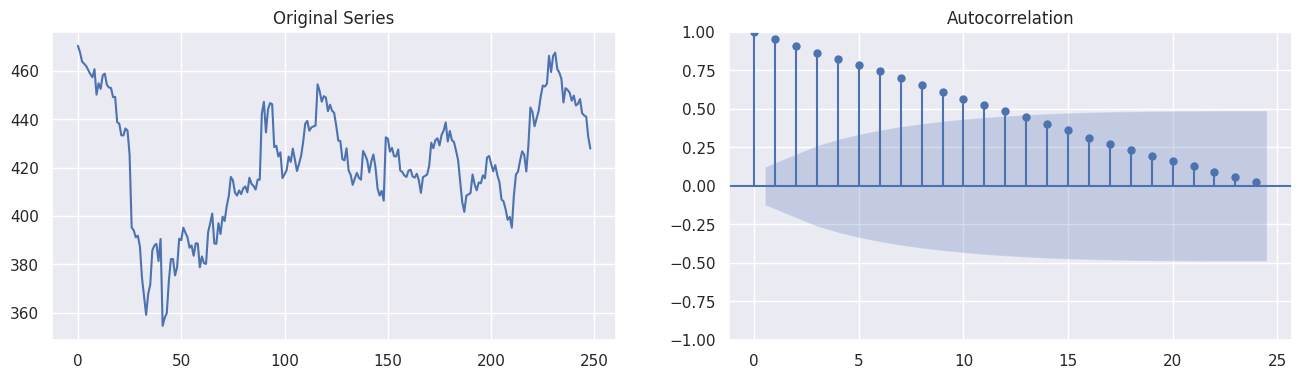

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df)
ax1.set_title('Original Series')

plot_acf(df, ax=ax2)
plt.show();

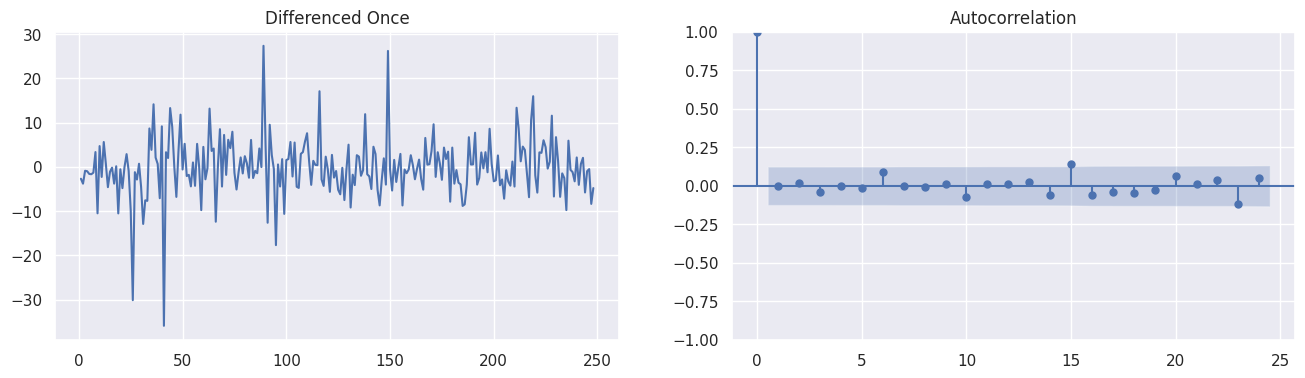

In [8]:
diff = df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Differenced Once')

plot_acf(diff, ax=ax2);

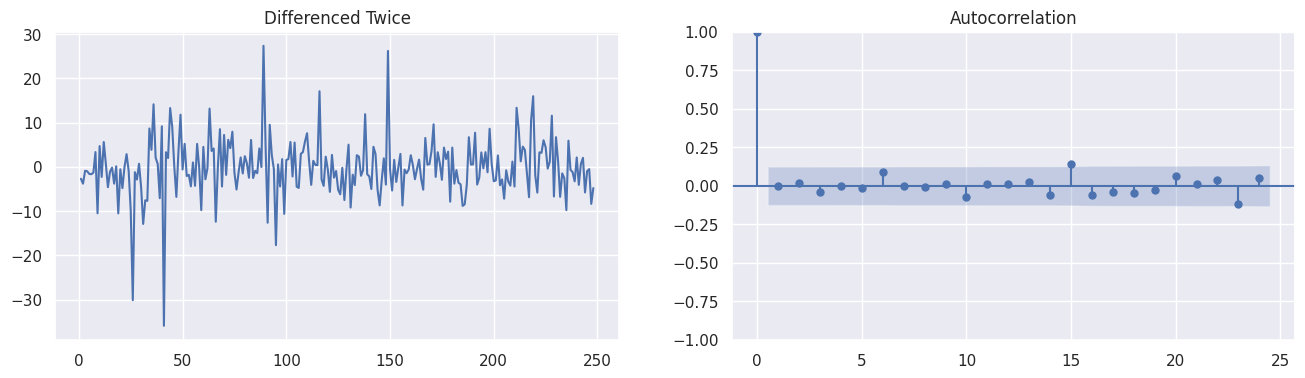

In [9]:
diff = df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Differenced Twice')

plot_acf(diff, ax=ax2);

In [13]:
# Quantity of differencing required to make this series stationary

from pmdarima.arima.utils import ndiffs

ndiffs(df, test='adf')

1

### p

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags.

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

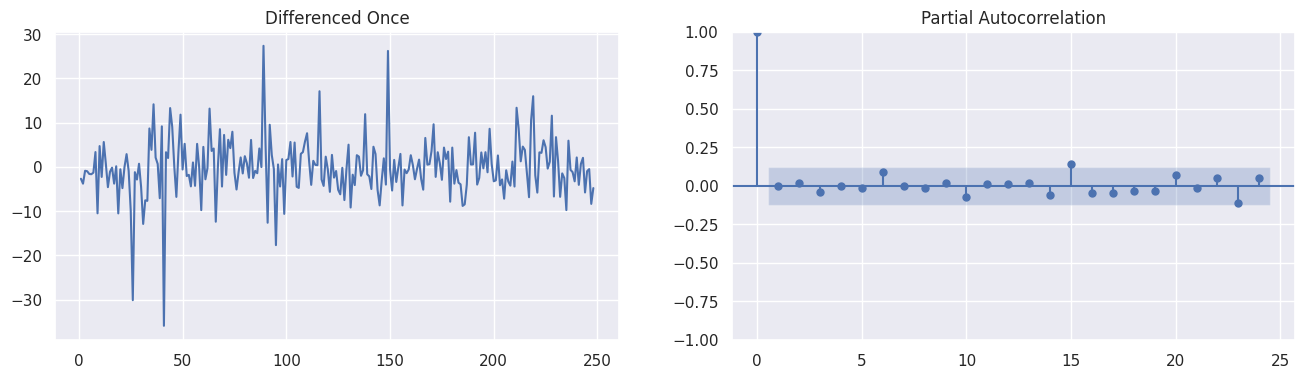

In [15]:
diff = df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Differenced Once')

ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

We can observe that the PACF lag **15** is significant as it's above the significance line.

### q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

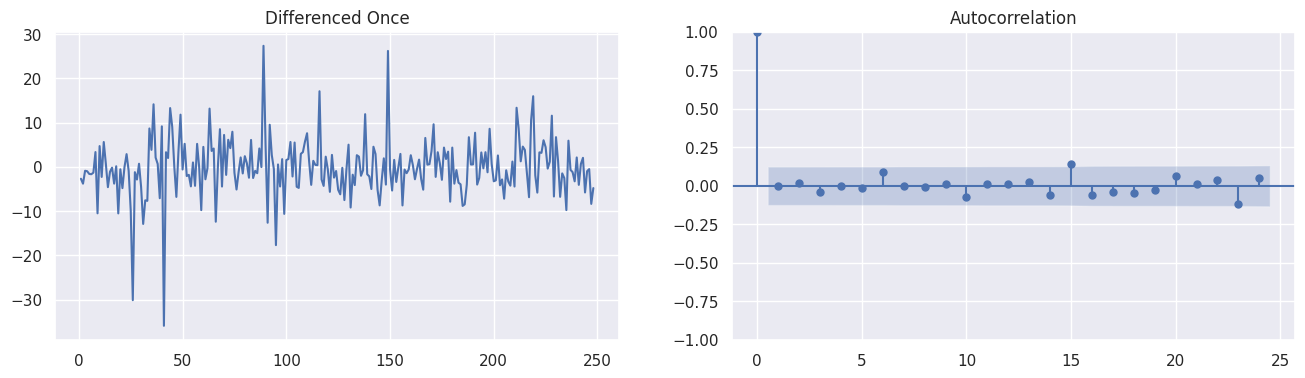

In [17]:
diff = df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Differenced Once')

ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

### Fitting the ARIMA model

* p = 6
* d = 1
* q = 2

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(df, order=(6, 1, 4))
result = model.fit()

In [38]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                  249
Model:                 ARIMA(6, 1, 4)   Log Likelihood                -815.920
Date:                Sun, 08 Jun 2025   AIC                           1653.840
Time:                        14:13:46   BIC                           1692.487
Sample:                             0   HQIC                          1669.398
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1675      0.233      0.719      0.472      -0.289       0.624
ar.L2         -0.5033      0.194     -2.593      0.010      -0.884      -0.123
ar.L3          0.2093      0.214      0.977      0.3

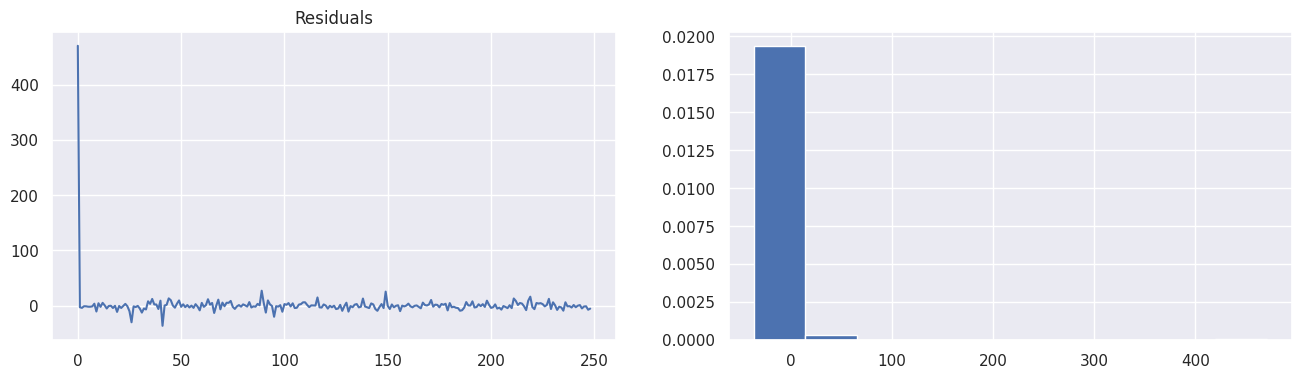

In [39]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax1.set_title('Residuals')

ax2.hist(residuals, density=True);

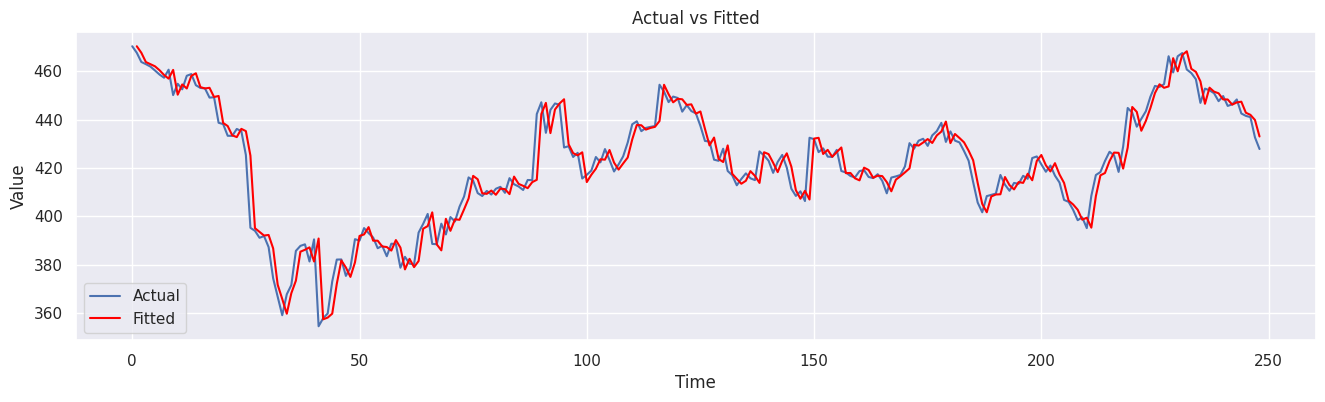

In [44]:
# Actual vs Fitted

# Get the fitted values
fitted_values = result.predict(start=1, end=len(df)-1) # Predict for the entire training data

# Plot the original data and the fitted values
plt.figure(figsize=(16, 4))
plt.plot(df.index, df, label='Actual')
plt.plot(fitted_values.index, fitted_values, color='red', label='Fitted')
plt.title('Actual vs Fitted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show();

### Train and Test

In [59]:
import statsmodels
statsmodels.tsa.arima.model.ARIMA

statsmodels.tsa.arima.model.ARIMA

In [45]:
n = int(len(df) * 0.8)
train = df[:n]
test = df[n:]

In [46]:
print(len(train))
print(len(test))

199
50


In [47]:
model = ARIMA(train, order=(6, 1, 4))
result = model.fit()

In [48]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close/Last   No. Observations:                  199
Model:                 ARIMA(6, 1, 4)   Log Likelihood                -657.086
Date:                Sun, 08 Jun 2025   AIC                           1336.173
Time:                        14:53:17   BIC                           1372.344
Sample:                             0   HQIC                          1350.813
                                - 199                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0237      0.146      0.162      0.871      -0.263       0.310
ar.L2         -0.7114      0.139     -5.127      0.000      -0.983      -0.439
ar.L3          0.0738      0.100      0.738      0.461      -0.122       0.270
ar.L4         -0.9187      0.122     -7.529      0.000      -1.158      -0.680
ar.L5         -0.0770      0.103     -0.749      0.454      -0.279       0.125
ar.L6          0.0366      0.102      0.358      0.720      -0.164       0.237
ma.L1         -0.0513      0.136     -0.378      0.706      -0.317       0.215
ma.L2          0.7558      0.113      6.671      0.000       0.534       0.978
ma.L3         -0.1185      0.127     -0.932      0.351      -0.368       0.131
ma.L4          0.9179      0.135      6.788      0.000       0.653       1.183
sigma2        45.2550      3.697     12.240      0.000      38.009      52.501
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               345.43
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
# O método forecast agora retorna apenas a previsão
# O método get_forecast é mais adequado para obter previsões e intervalos de confiança
forecast_results = result.get_forecast(steps=step)

# O objeto PredictionResultsWrapper retornado por get_forecast tem um método conf_int
conf = forecast_results.conf_int(alpha=0.05) # alpha=0.05 para 95% de confiança

# A previsão (fc) pode ser acessada a partir do objeto forecast_results
fc = forecast_results.predicted_mean

# O erro padrão para cada passo também pode ser acessado
se_estimated = forecast_results.se_mean

print("Previsão (fc):")
print(fc)
print("\nIntervalo de Confiança (conf):")
print(conf)
print("\nErro padrão estimado para cada passo (se_estimated):")
print(se_estimated)

Previsão (fc):
199    423.398376
200    423.232658
201    422.275045
202    423.564747
203    424.238485
204    423.790169
205    424.260822
206    423.523497
207    422.384726
208    423.324237
209    423.729015
210    423.610858
211    424.509678
212    423.842502
213    422.692598
214    423.318130
215    423.299928
216    423.308962
217    424.509031
218    424.019159
219    423.080902
220    423.511785
221    423.049449
222    423.020626
223    424.324325
224    424.000064
225    423.419983
226    423.811047
227    422.996630
228    422.852721
Name: predicted_mean, dtype: float64

Intervalo de Confiança (conf):
     lower Close/Last  upper Close/Last
199        410.204431        436.592322
200        404.835592        441.629724
201        399.521103        445.028988
202        397.314186        449.815307
203        395.110221        453.366749
204        392.212253        455.368086
205        390.305134        458.216510
206        387.171928        459.875067
207        383.7

In [52]:
fc

,predicted_mean
199,423.398376
200,423.232658
201,422.275045
202,423.564747
203,424.238485
204,423.790169
205,424.260822
206,423.523497
207,422.384726
208,423.324237


In [70]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf.values[:, 0], index=test[:step].index)
upper = pd.Series(conf.values[:, 1], index=test[:step].index)

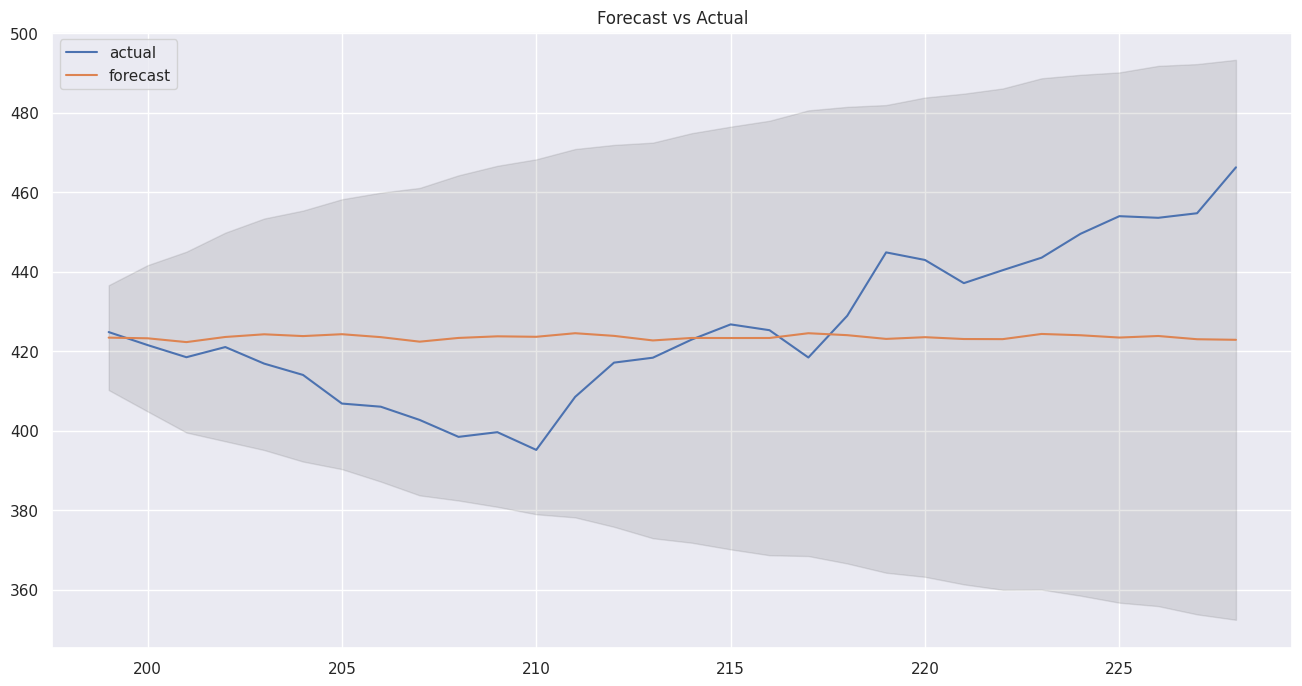

In [72]:
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left");